In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:/Users/INDIA/Downloads/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

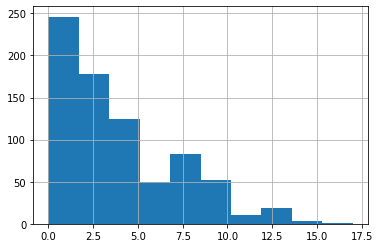

In [5]:
df['Pregnancies'].hist()

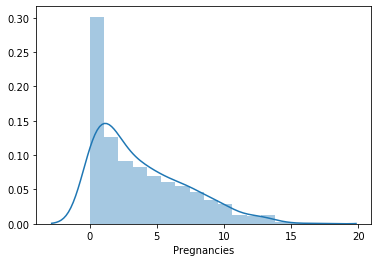

In [6]:
sns.distplot(df['Pregnancies'])

In [7]:
fixed_skewness=np.log(df['Pregnancies'].values,dtype=np.float)

C:\Users\INDIA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [8]:
#sns.distplot(fixed_skewness)       #doubt    

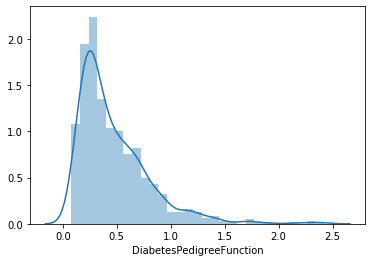

In [9]:
sns.distplot(df['DiabetesPedigreeFunction'])

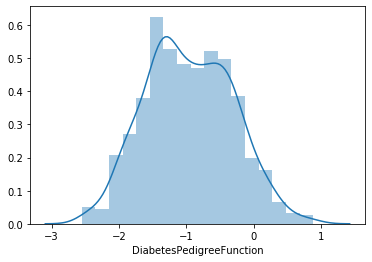

In [10]:
sns.distplot(np.log(df['DiabetesPedigreeFunction']))

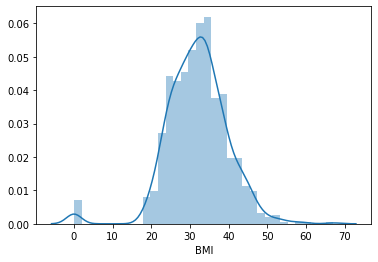

In [11]:
sns.distplot(df['BMI'])                       # univairate analysis

In [12]:
df_iris=pd.read_csv('C:/Users/INDIA/Downloads/Iris.csv',index_col=0)

In [13]:
df_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


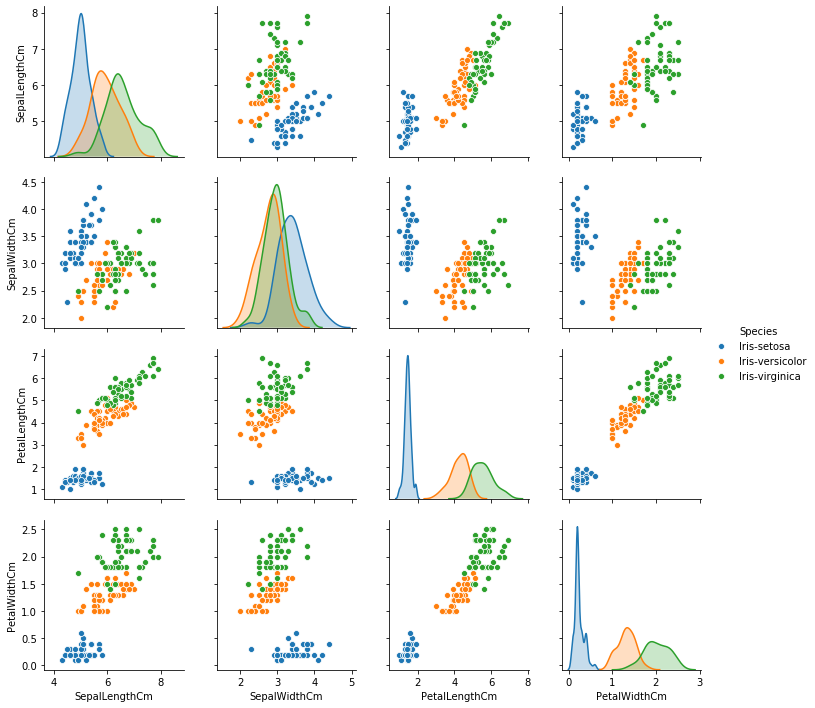

In [14]:
#  Bivariate analysis
sns.pairplot(df_iris,hue='Species')

In [15]:
mapping={ 0:'NO',1:'YES'}
df['Outcome']=df['Outcome'].map(mapping)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES


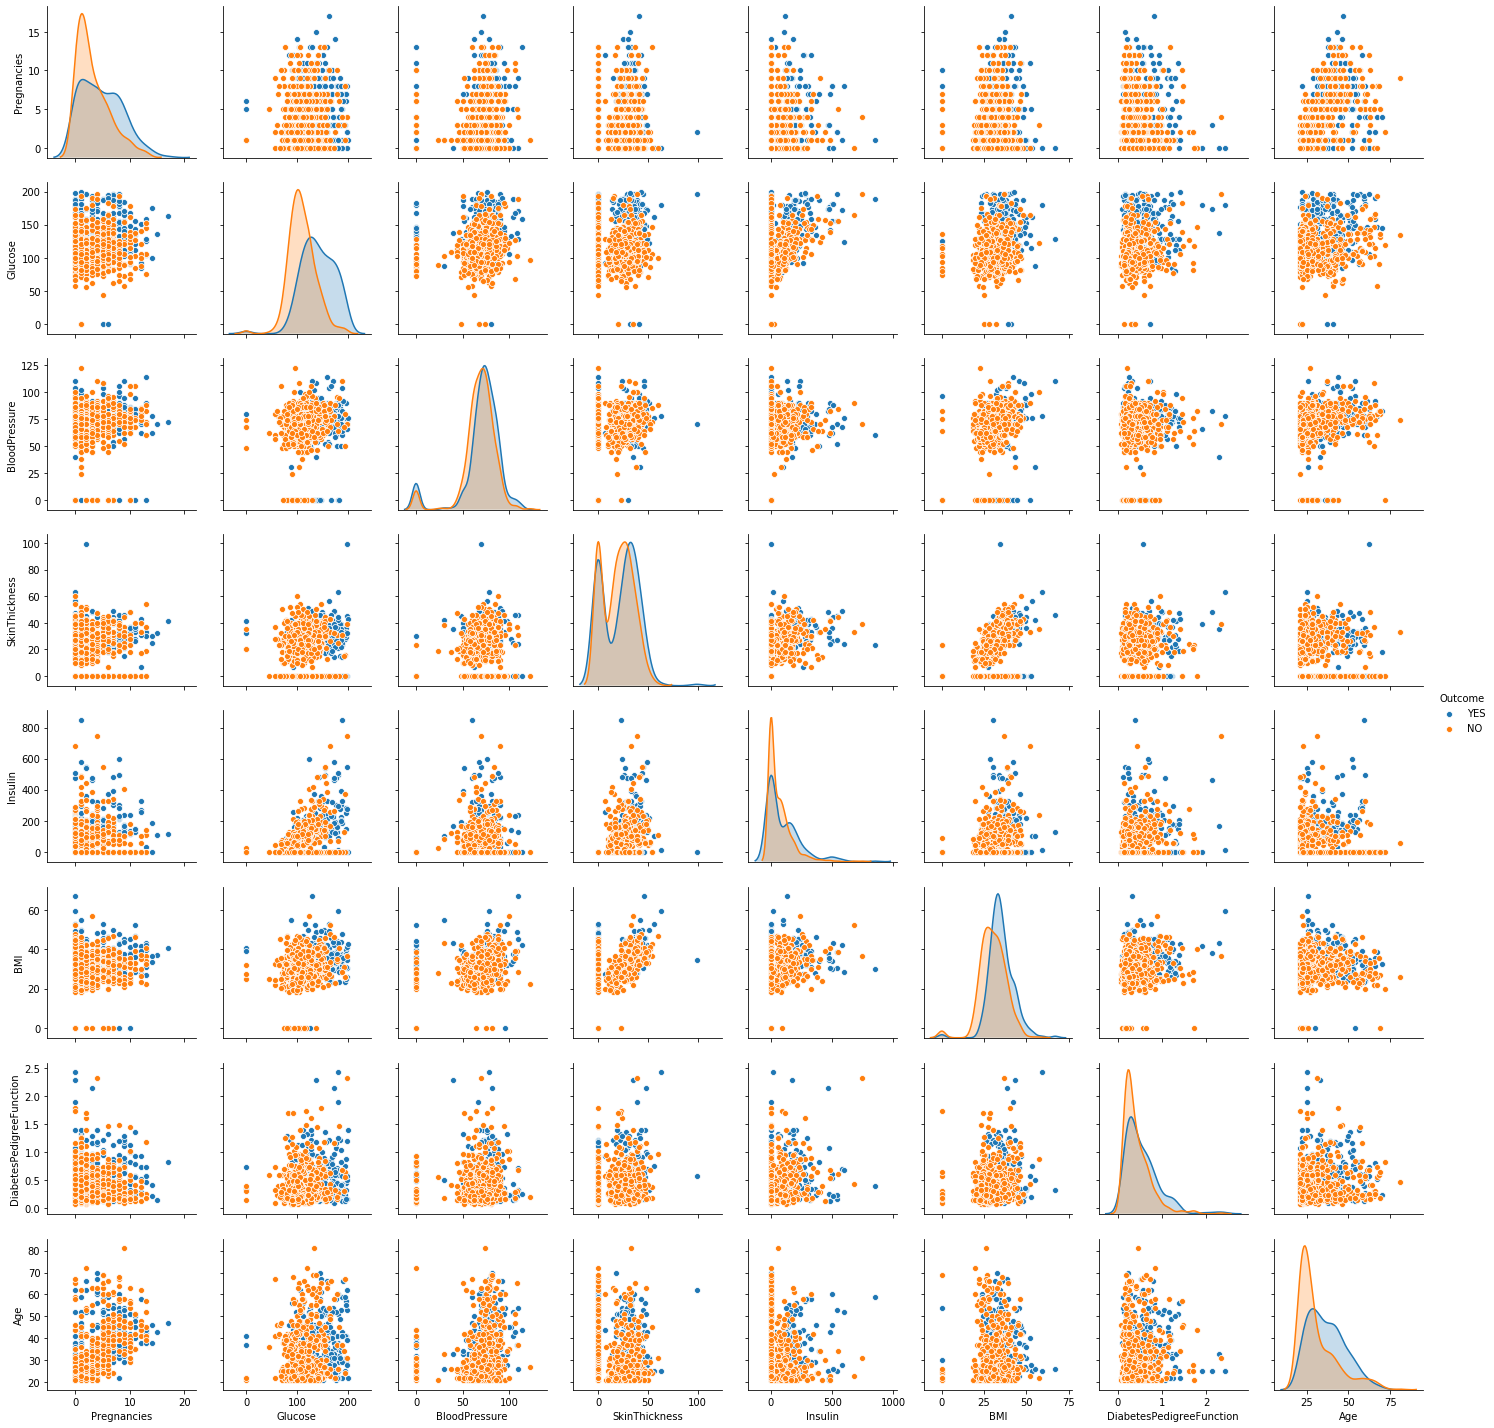

In [16]:
sns.pairplot(df,hue='Outcome')

In [17]:
mapping={'NO':0,"YES":1}
df['Outcome']=df['Outcome'].map(mapping)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


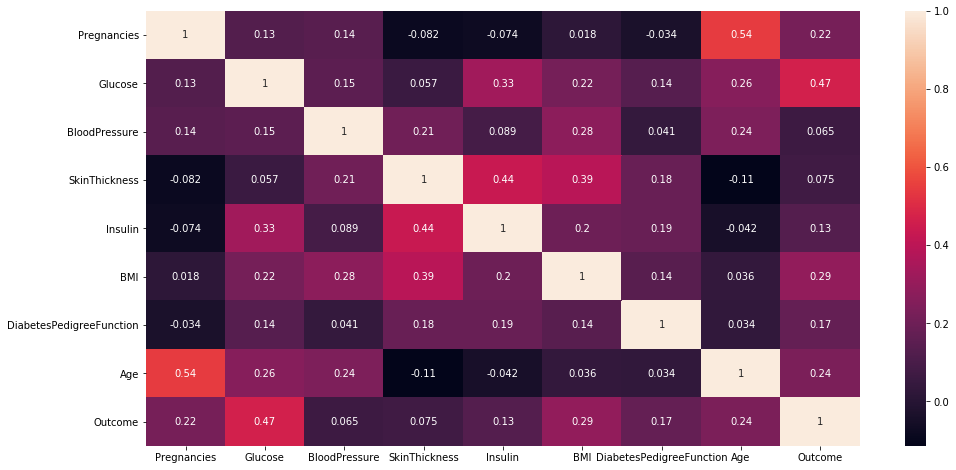

In [18]:
corr_mat=df.corr()

plt.figure(figsize=(16,8))
sns.heatmap(corr_mat,annot=True)

In [19]:
 #model implimentation
#Let's create numpy arrays for features and target
X=df.drop('Outcome',axis=1).values
y=df['Outcome'].values

In [20]:
#importing train_test_split
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [22]:
# let's have a look on enumerate 

arr=[1,2,3,5,6,7]
for ind,val in enumerate(arr):
    print(ind, val)

0 1
1 2
2 3
3 5
4 6
5 7


In [23]:
from sklearn.neighbors import KNeighborsClassifier

#setup arrays to store training and test accuracies
neighbors=np.arange(1,9)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

for i ,j in enumerate(neighbors):
    #setup a KNN classifier with k neighbors
    knn=KNeighborsClassifier(n_neighbors=j)
    
    #fit the model
    knn.fit(X_train,y_train)
    
    #compute accuracy on training set
    train_accuracy[i]=knn.score(X_train,y_train)
    
    #compute accuracy on the test set
    test_accuracy[i]=knn.score(X_test,y_test)

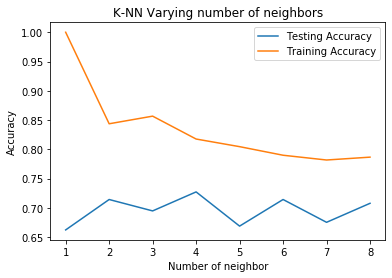

In [24]:
plt.title('K-NN Varying number of neighbors')
plt.plot(neighbors,test_accuracy,label='Testing Accuracy')
plt.plot(neighbors,train_accuracy,label='Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbor')
plt.ylabel('Accuracy')
plt.show()

In [25]:
knn=KNeighborsClassifier(n_neighbors=7)

In [26]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [27]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.6753246753246753

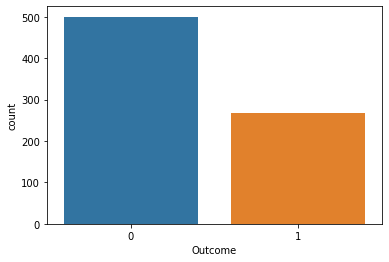

In [28]:
sns.countplot(df['Outcome'])

In [29]:
df['Outcome'].value_counts()/len(df)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
y_pred=knn.predict(X_test)

In [32]:
confusion_matrix(y_test,y_pred)

array([[78, 22],
       [28, 26]], dtype=int64)

In [33]:
pd.crosstab(y_test,y_pred,rownames=['True'],colnames=['Predicted'],margins=True)

Predicted,0,1,All
True,,,
0,78,22,100
1,28,26,54
All,106,48,154


In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       100
           1       0.54      0.48      0.51        54

    accuracy                           0.68       154
   macro avg       0.64      0.63      0.63       154
weighted avg       0.67      0.68      0.67       154



In [36]:
y_pred_proba=knn.predict_proba(X_test)[:,1]

In [37]:
from sklearn.metrics import roc_curve

In [38]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)

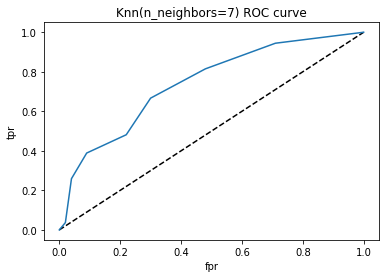

In [39]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [40]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7396296296296296

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid={'n_neighbors':np.arange(1,50)}

In [43]:
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [44]:
knn_cv.best_score_

0.7578125

In [45]:
knn_cv.best_params_

{'n_neighbors': 14}

In [46]:
model=knn_cv.best_estimator_

In [47]:
model.score(X_test,y_test)

0.7402597402597403